<a href="https://colab.research.google.com/github/Kushan1001/Hotel-booking-data-analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file_path = '/content/drive/MyDrive/Capstone project/EDA/Data/Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)


In [ ]:
# a glance of the pandas dataframe
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# checking percentage of null values in the dataframe
hotel_df.isnull().sum()/len(hotel_df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [ ]:
# Dropping agent and company's columns as there are high percentage of null values
hotel_df.drop(columns=['company','agent'],inplace = True)

In [ ]:
# getting sum of null values of the country's column
hotel_df['country'].isnull().sum()

488

In [ ]:
# getting mode of the coutry's column
hotel_df['country'].mode()

0    PRT
dtype: object

In [ ]:
# filling NA values of the country's column with mode of the data
hotel_df['country'] = hotel_df['country'].fillna('PRT')

In [ ]:
#getting statistics of the data 
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

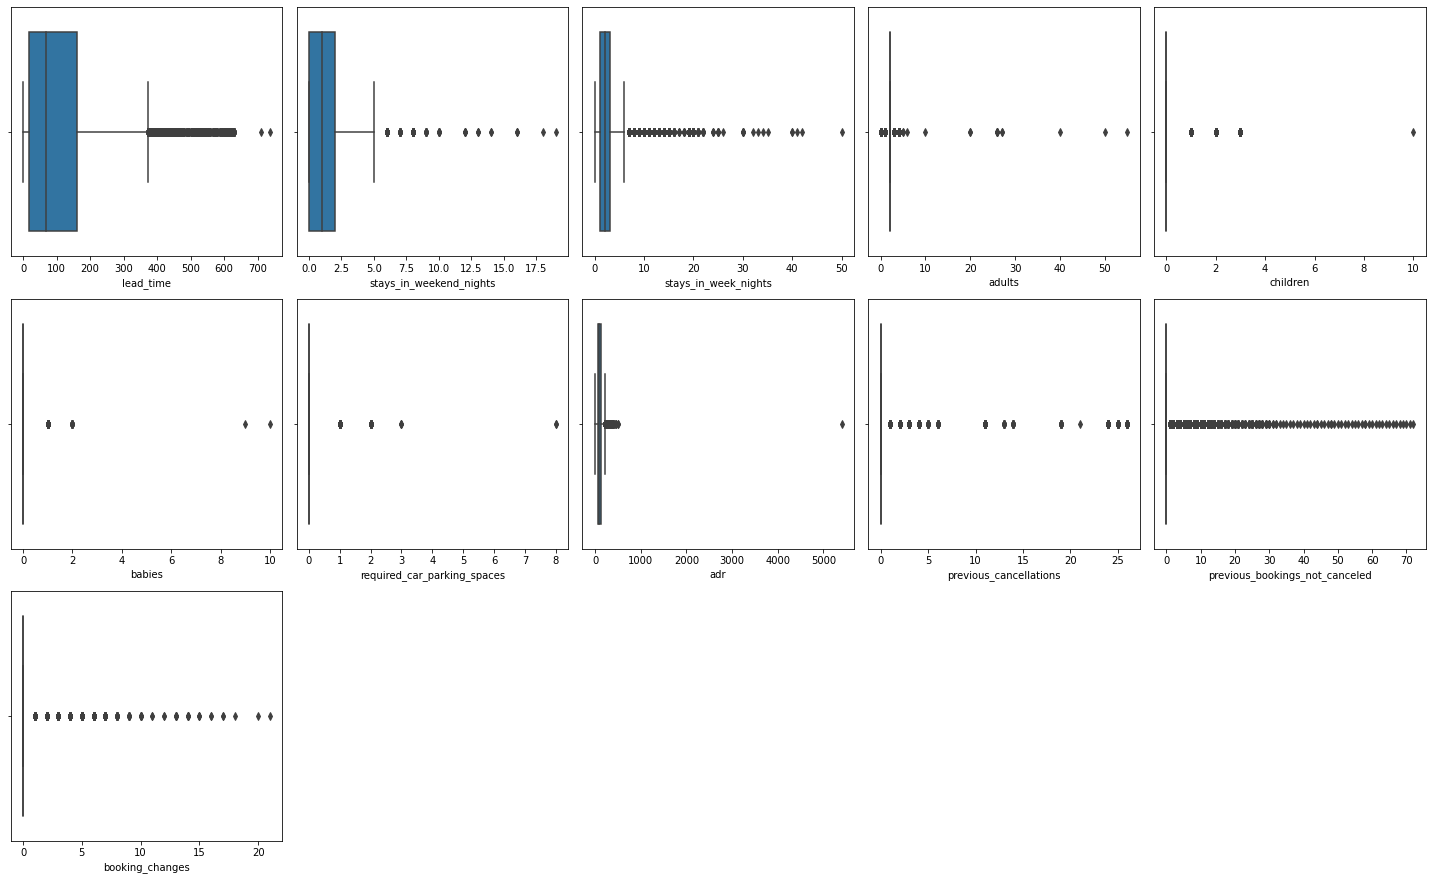

In [ ]:
# checking for ouliers
list_of_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize = (20,20))

for elem in list_of_columns:
  plt.subplot(5,5,n)
  n = n+1
  sns.boxplot(hotel_df[elem])
  plt.tight_layout()

In [ ]:
#removing outliers based on conditional filtering
hotel_df = hotel_df.loc[hotel_df['lead_time'] < hotel_df['lead_time'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['stays_in_weekend_nights'] < hotel_df['stays_in_weekend_nights'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['stays_in_week_nights'] < hotel_df['stays_in_week_nights'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['adults'] < 4]
hotel_df = hotel_df.loc[hotel_df['children'] < 5]
hotel_df = hotel_df.loc[hotel_df['babies'] < 4]
hotel_df = hotel_df.loc[hotel_df['required_car_parking_spaces'] < 5]
hotel_df = hotel_df.loc[hotel_df['adr'] < 1000]


## **Data Analysis and Visualistion**

In [ ]:
#creating a new column of adults with children to check weather adults prefer to travel solo or with children/babies 
def do_adults_travel_with_family(col_1,col_2):
  ''' takes argument as children and babies 
      and compares it with adults and returns
      1 for if they any children/babies and 0 
      for if they don't have any'''
  if col_1 or col_2 != 0:
    return 1
  else:
    return 0

hotel_df['adults_with_children'] = hotel_df.apply(lambda x: do_adults_travel_with_family(x['children'],x['babies']),axis = 1)



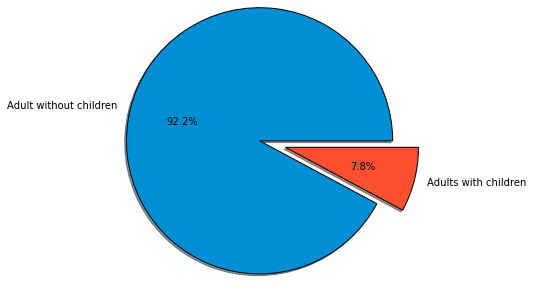

In [ ]:
# visualising proportion of adults with and without any children

explode = [0.0,0.3]
labels = ['Adult without children','Adults with children']
colors = ['#008fd5','#fc4f30']
title = ('proportion of adults with and without any children')

plt.pie(hotel_df['adults_with_children'].value_counts(), wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',
        explode = explode, labels = labels, colors = colors,radius = 1.5, shadow = 'True')


plt.tight_layout()

In [ ]:
special_requests = hotel_df.groupby('adults_with_children')['total_of_special_requests'].count().reset_index()

In [ ]:
special_requests

,adults_with_children,total_of_special_requests
0,0,105342
1,1,8952


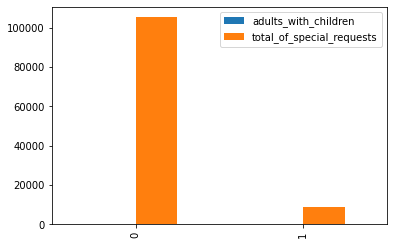

In [ ]:
special_requests.plot(kind='bar')